In [1]:
#Importing relevant Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
Data1 = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")

In [8]:
Data1.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
# We can drop the Column ID since its not relevent:
Data2 = Data1.drop("ID", axis=1)

In [7]:
Data2.head(5)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [8]:
Data2.shape

(5000, 13)

In [9]:
Data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [10]:
Data2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


# 1) Read the column description and ensure you understand each attribute well.
        The Dataset has 13 columns 5000 rows, its a good representation of population:
        
        Out of 13 Columns, "Personal Loan" is the target variable and remaining 12 are independent attributes:
        1) Age,Experience,Income,Zip Code, Family and Education: These coulmns represent customer demographic information.
        2) CCAvg, Mortgage, Personal Loan, Securities Account, CD Account, Online, Creditcard: These columns represent customers         relationship with bank.
        
        Categorical Variables: The columns Family,Education, Personal Loan, Securities Account, CD Account, Online and                   CreditCard are categorical variables.
        
        Expercience: The variable Experience is having Negative values.
        
        Income,CCAvg and Mortgage: These three columns have skewed distribution and there might be few outliers.
        
        
        

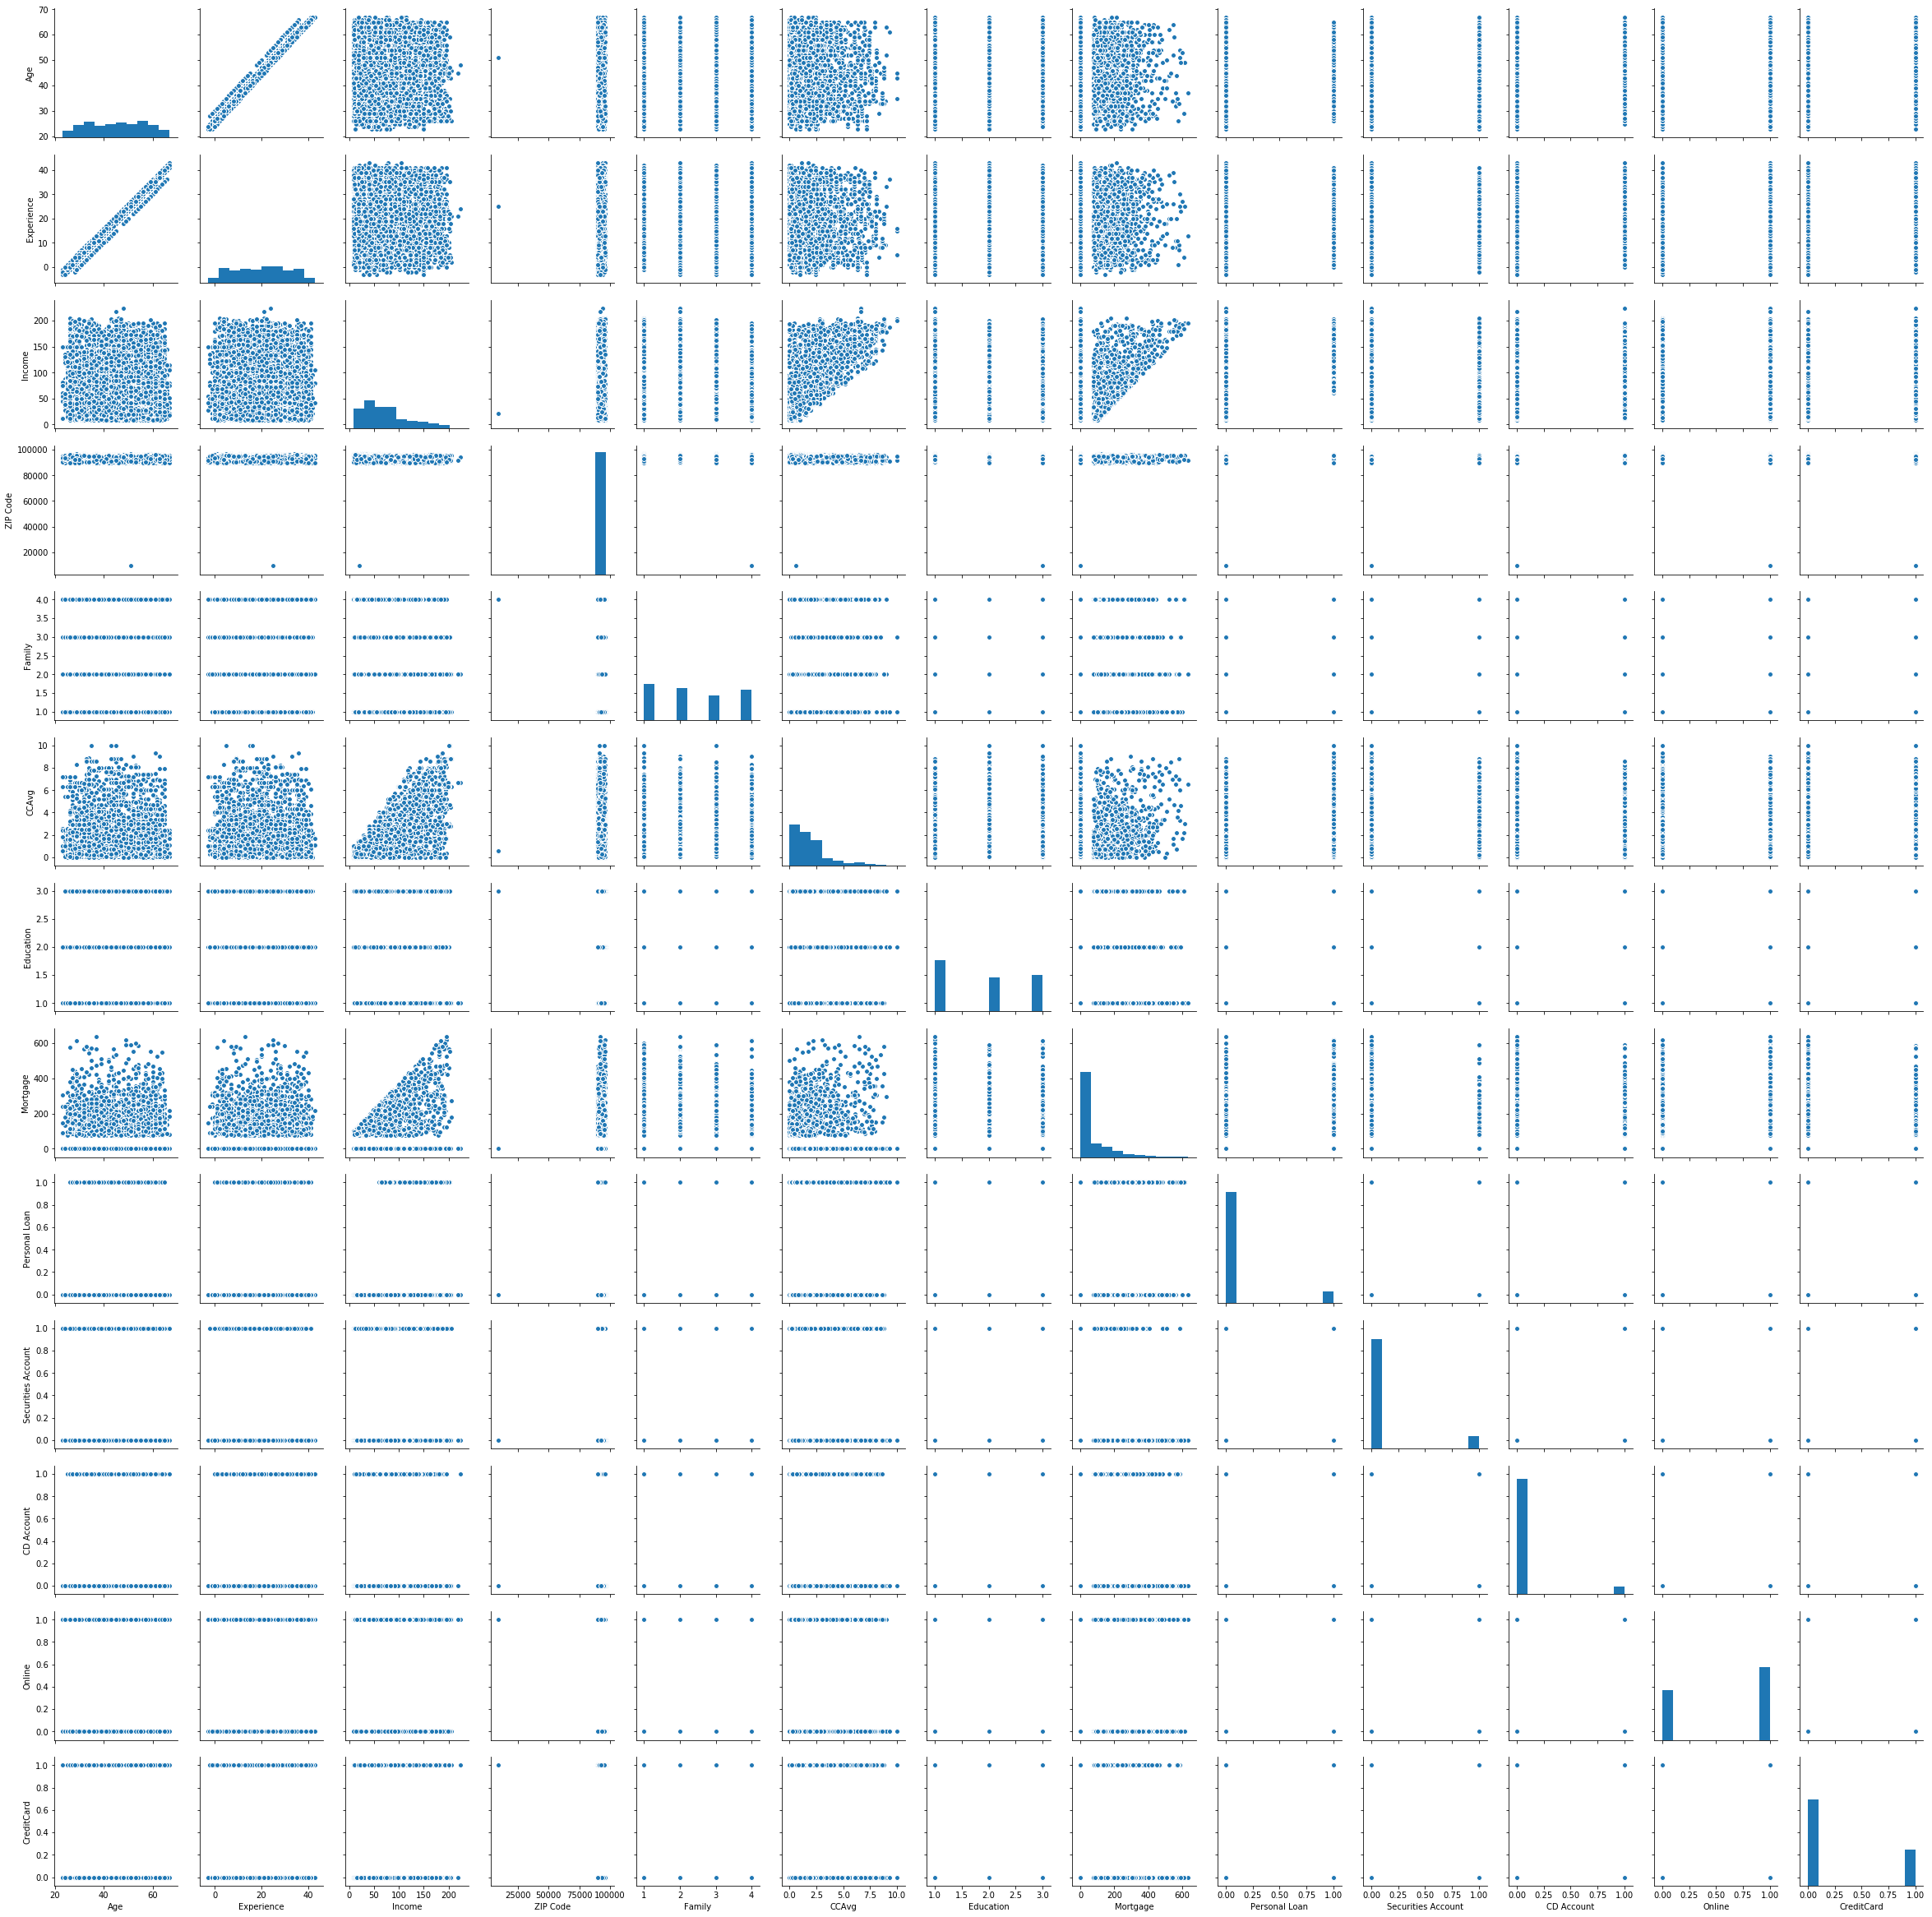

In [9]:
%matplotlib inline 
sns.pairplot(Data2)

In [11]:
# Plotting Box plots for attributes "Income","CCAvg" and "Mortgage":

In [12]:
sns.set(style="whitegrid", color_codes=True)
px= sns.boxplot(x="Income", data= Data2)

/usr/local/anaconda/python3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


In [13]:
sns.set(style="whitegrid", color_codes=True)
px= sns.boxplot(x="CCAvg", data= Data2)

/usr/local/anaconda/python3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


In [14]:
sns.set(style="whitegrid", color_codes=True)
px= sns.boxplot(x="Mortgage", data= Data2)

/usr/local/anaconda/python3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


In [15]:
# From the Box plots it is evident that the skewed distribution in the attributes "Income","CCAvg" and "Mortgage" is not
# because of outliers. But the data itself is skewed.

In [16]:
# Checking the distribution in "Experience" column, to check negative values in distribution.

In [17]:
sns.set(style="whitegrid", color_codes=True)
px= sns.boxplot(x="Experience", data= Data2, hue=True)

/usr/local/anaconda/python3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


# 2) studying data distribution in each attributes, Share your findings:

In [18]:
categorical = ["Family","Education","Securities Account","CD Account","Online","CreditCard"]
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 25))
for col, ax in zip(categorical[0:], axs.ravel()):
    sns.countplot(x=col, data=Data2, ax=ax)

/usr/local/anaconda/python3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


# From the distribution of the independent attribute we can infer that:
    1) Majority of the banks customers are having a family size of 1
    2) Majority of banks customers are Undergraduates followed by Advanced/Professional and Graduates.
    3) Majority of banks existing customers are not holding "Securities account" and "CD account"
    4) Majority of existing customers are using Online banking facility
    5) Majority of banks customers do not have a Credit card.

# Observations based on the distribution of People who have taken the personal loan:

In [19]:
Data2_loan_yes = Data2.loc[Data2["Personal Loan"]==1]

/usr/local/anaconda/python3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


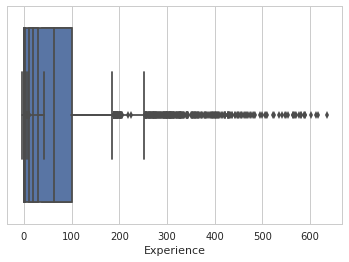

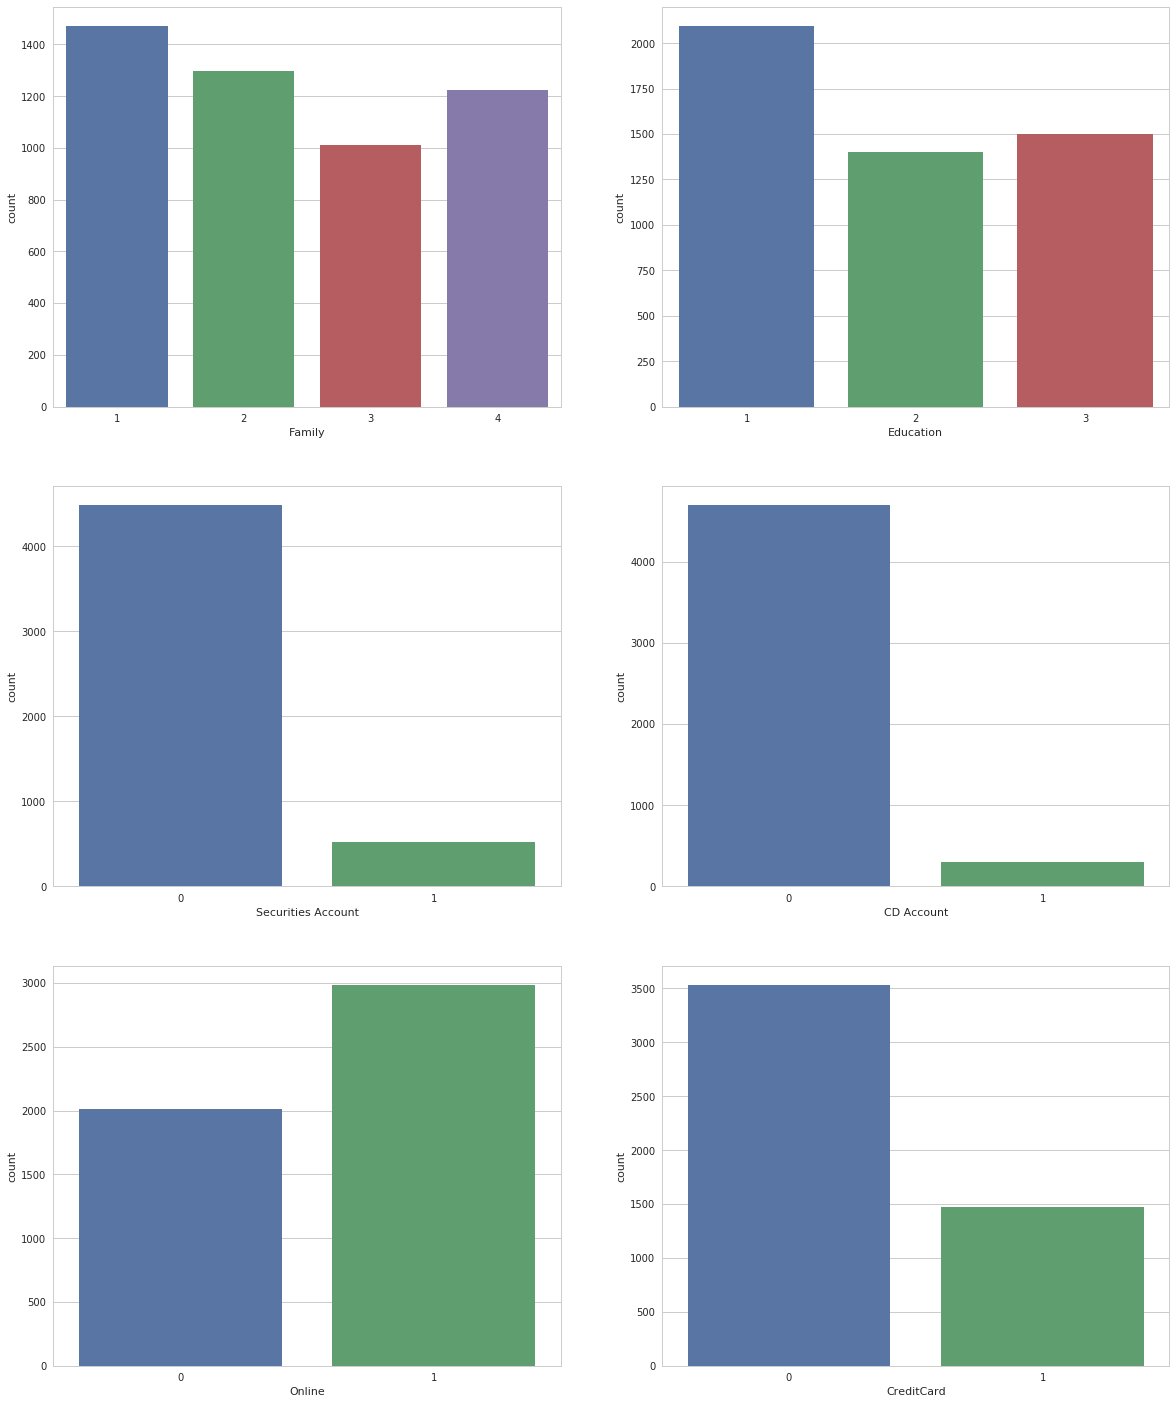

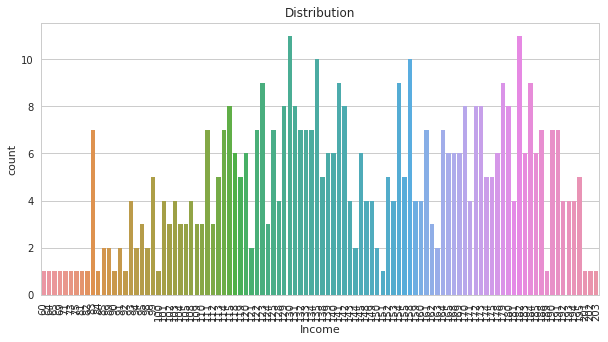

In [20]:
# Relationship between Income and People who have taken personal loan:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))
sns.countplot(x='Income', data=Data2_loan_yes)
plt.xticks(rotation='vertical')
plt.title('Distribution')
plt.show()

In [21]:
Data2_loan_yes.Income.mean()

144.74583333333334

# Income > 144k are more likely to take Personal Loan

/usr/local/anaconda/python3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


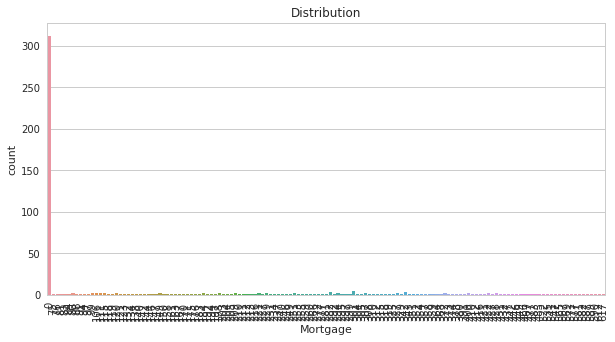

In [22]:
# Relationship between Mortgage and People who have taken personal loan:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))
sns.countplot(x='Mortgage', data=Data2_loan_yes)
plt.xticks(rotation='vertical')
plt.title('Distribution')
plt.show()

# No Mortgage people are more prone to take personal loans

/usr/local/anaconda/python3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


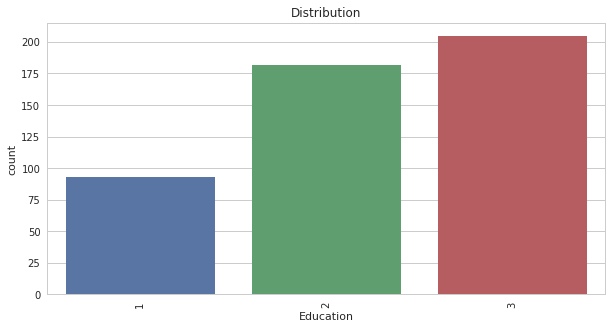

In [23]:
# Relationship between Education and People who have taken personal loan:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))
sns.countplot(x='Education', data=Data2_loan_yes)
plt.xticks(rotation='vertical')
plt.title('Distribution')
plt.show()

# higher level of education are more likely to take personal loan followed by graduate

/usr/local/anaconda/python3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


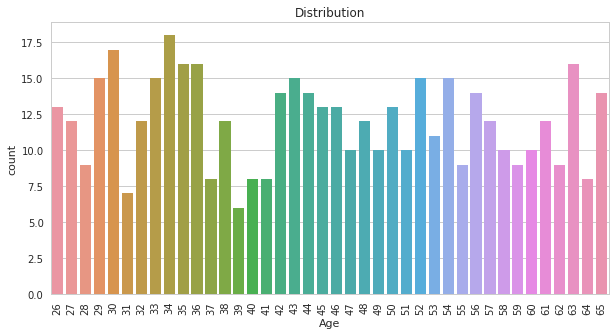

45.06666666666667

In [24]:
# Relationship between Age and People who have taken personal loan:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))
sns.countplot(x='Age', data=Data2_loan_yes)
plt.xticks(rotation='vertical')
plt.title('Distribution')
plt.show()
Data2_loan_yes.Age.mean()

# Age on higer side are more likely to take personal loan. The Average age of people who have taken loan is 45 years.

# 3) Get the target column distribution. Your comments:

In [25]:
Target = Data2["Personal Loan"]
sns.countplot(x= Target, data=Data2)

/usr/local/anaconda/python3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


# It is evident from the distribution of Target variable("Personal Loan") that approximately only 10% of the customers have accepted the personal Loan.

# From the data set , we have only 468 records which are positive and rest as negative .

# This is clearly an Imbalanced Class


In [26]:
Data2.corr()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052030,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050089,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645993,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004068,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109285,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052030,-0.050089,0.645993,-0.004068,-0.109285,1.000000,-0.136138,0.109909,0.366891,0.015087,0.136537,-0.003620,-0.006686
Education,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136138,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109909,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366891,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.004704,0.019994,0.015087,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


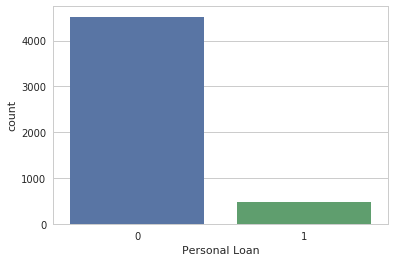

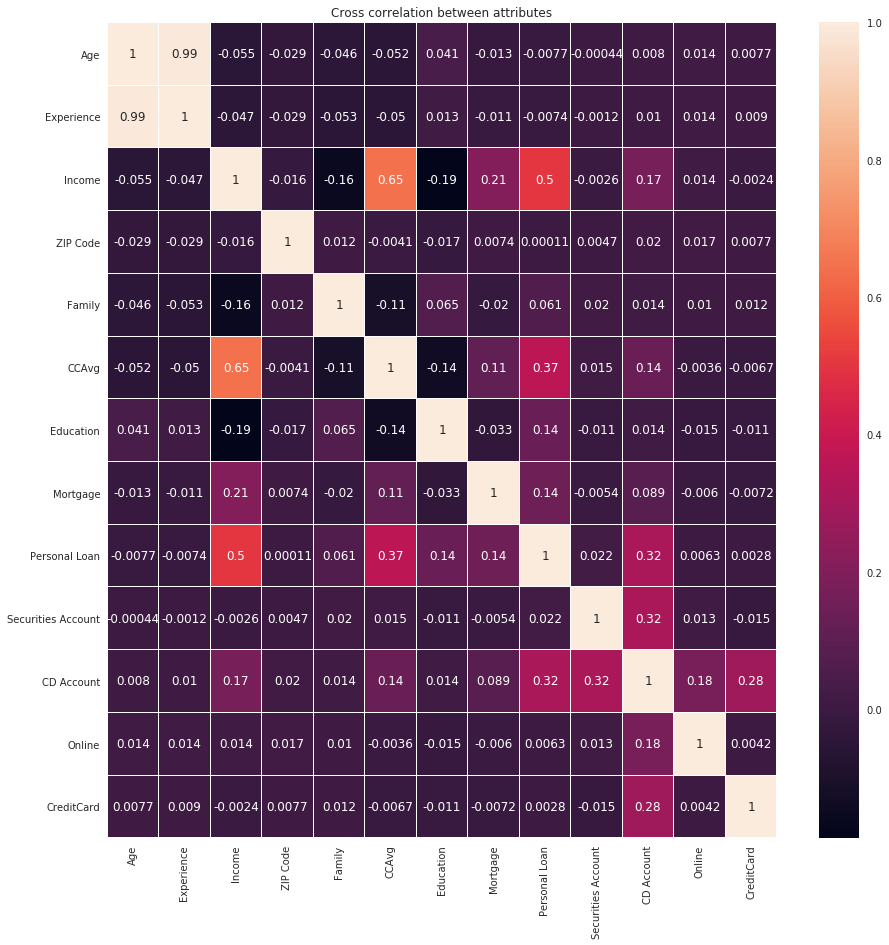

In [27]:
plt.figure(figsize=(15, 15))
ax = sns.heatmap(Data2.corr(), annot = True, fmt='.2g', linewidths = 0.01)
plt.title('Cross correlation between attributes')
plt.show()

#  From the correlation matrix we can infer that:
    1)The attributes "Experience" and "Age" are having high positive correlation (correlation cofficient = 0.99)
    2)The attributes "Income" and "CCAvg" has good positive correlation (correlation cofficient = 0.65)
    
    The attributes that are having good correlation with Target varibale("Personal Loan") are:
    1) Income (0.5)
    2) CCAvg (0.37)
    3) CD Account (0.32)
    
    The attribute "Zip Code" has having very least correlation with respect to Target variable (0.00011)

# From the data set , we have only 468 records which are positive and rest as negetive .
# This is clearly an Imbalanced Class

In [28]:
# Therefore, if we were to always predict 0 - people who will not take loan, we'd achieve an accuracy more than 90%.
# On the contrary , for people who will take loan , hardly we will achieve 10% accuracy

In [29]:
# Up Sampling is one technique which can be used to make this data unbiased

In [30]:
# Separate majority and minority classes
df_majority = Data2[Data2['Personal Loan']==0]
df_minority = Data2[Data2['Personal Loan']==1]

In [31]:
from  sklearn.utils import resample
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=4532,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled['Personal Loan'].value_counts()

1    4532
0    4520
Name: Personal Loan, dtype: int64

In [32]:
X = df_upsampled.drop("Personal Loan",axis=1)
Y = df_upsampled["Personal Loan"]

# 4) Split the data into training and test set in the ratio of 70:30 respectively.

In [33]:
import sklearn
from sklearn.cross_validation import train_test_split

/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [34]:
# Splitting Data into 70% Training data and 30% Testing Data:
x_train, x_test, y_train,  y_test = train_test_split(X, Y,train_size=0.7, test_size=0.3, random_state=0)
print(len(x_train))
print(len(x_test))

6336
2716


# Model-1 : Logistic Regression

In [35]:
# Importing SK Learn library and Splitting the Data into Dependent and Independent Variables:
#import sklearn
#from sklearn.cross_validation import train_test_split

In [36]:
# Splitting Data into 70% Training data and 30% Testing Data:
x1_train, x1_test, y1_train,  y1_test = train_test_split(X, Y,train_size=0.7, test_size=0.3, random_state=0)
print(len(x1_train))
print(len(x1_test))

6336
2716


In [37]:
# Lets use the classification algorithm "LogisticRegression":
from sklearn.linear_model import LogisticRegression
logisticregression = LogisticRegression()
Model1 = logisticregression.fit(x1_train, y1_train)
model_unsampled = logisticregression.fit(X, Y)

In [38]:
print(Model1.score(x1_train,y1_train))
print(Model1.score(x1_test,y1_test))

0.8944128787878788
0.8877025036818851


In [39]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics
y1_predict = Model1.predict(x1_test)
model1_score = Model1.score(x1_test, y1_test)
print(model1_score)
print(metrics.confusion_matrix(y1_test, y1_predict))

0.8877025036818851
[[1213  155]
 [ 150 1198]]


In [40]:
print(metrics.classification_report(y1_test, y1_predict))

             precision    recall  f1-score   support

          0       0.89      0.89      0.89      1368
          1       0.89      0.89      0.89      1348

avg / total       0.89      0.89      0.89      2716



In [41]:
y_unsampled_predit = model_unsampled.predict(X)
print(y_unsampled_predit)

[0 0 0 ... 1 1 1]


In [42]:
from sklearn.metrics import accuracy_score
print( accuracy_score(Y, y_unsampled_predit) )

0.8923994697304463


# Analyzing the confusion matrix:
True Positives (TP): we correctly predicted the people have taken Personal loan 1215

True Negatives (TN): we correctly predicted the people who have not taken Personal loan 1202

False Positives (FP): we incorrectly predicted that people have taken loan (a "Type I error") 153 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that people have not taken loan (a "Type II error") 146 Falsely predict negative Type II error

# Model-2: Logistic regression

In [43]:
from sklearn import metrics

In [44]:
# Since "Zip code" is having least coefficient of correlation we can drop it from Dependant variables;
# Since "Experience" and "Age" are having high correlation of 0.99 we can drop either one of them from Dependant variables,Lets drop "Experience" since its having negative values.
X2 = X.drop(['Experience','ZIP Code'],axis=1)
Y2 = Y

In [45]:
print(X2.shape)
print(Y2.shape)

(9052, 10)
(9052,)


In [46]:
# Splitting Data into 70% Training data and 30% Testing Data:
x2_train, x2_test, y2_train,  y2_test = train_test_split(X2, Y2,train_size=0.7, test_size=0.3, random_state=0)
print(len(x2_train))
print(len(x2_test))

6336
2716


In [47]:
Model2 = logisticregression.fit(x2_train, y2_train)

In [48]:
print(Model2.score(x2_train,y2_train))
print(Model2.score(x2_test,y2_test))

0.8985164141414141
0.8902798232695139


In [49]:
# With Cleaning the Data the accuracy of the model got slightly improved:

In [50]:
y2_predict = Model2.predict(x2_test)
model_score = Model2.score(x2_test, y2_test)
print(model_score)
print(metrics.confusion_matrix(y2_test, y2_predict))

0.8902798232695139
[[1210  158]
 [ 140 1208]]


In [51]:
print(metrics.classification_report(y2_test, y2_predict))

             precision    recall  f1-score   support

          0       0.90      0.88      0.89      1368
          1       0.88      0.90      0.89      1348

avg / total       0.89      0.89      0.89      2716



# Analyzing the confusion matrix:
True Positives (TP): we correctly predicted the people have taken Personal loan 1210

True Negatives (TN): we correctly predicted the people who have not taken Personal loan 1208

False Positives (FP): we incorrectly predicted that people have taken loan (a "Type I error") 158 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that people have not taken loan (a "Type II error") 140 Falsely predict negative Type II error

# Model-3: K-Nearset neighbor's

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [53]:
x3_train, x3_test, y3_train,  y3_test = train_test_split(X2, Y2,train_size=0.7, test_size=0.3, random_state=0)

In [54]:
Model3 = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance')

In [55]:
Model3.fit(x3_train, y3_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

In [56]:
print(Model3.score(x3_train,y3_train))
print(Model3.score(x3_test,y3_test))

1.0
0.9337260677466863


In [57]:
y3_predict = Model3.predict(x3_test)
model_score = Model3.score(x3_test, y3_test)
print(model_score)
print(metrics.confusion_matrix(y3_test, y3_predict))

0.9337260677466863
[[1188  180]
 [   0 1348]]


In [58]:
print(metrics.classification_report(y3_test, y3_predict))

             precision    recall  f1-score   support

          0       1.00      0.87      0.93      1368
          1       0.88      1.00      0.94      1348

avg / total       0.94      0.93      0.93      2716



# Analyzing the confusion matrix:
True Positives (TP): we correctly predicted the people have taken Personal loan 1188

True Negatives (TN): we correctly predicted the people who have not taken Personal loan 1348

False Positives (FP): we incorrectly predicted that people have taken loan (a "Type I error") 180 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that people have not taken loan (a "Type II error") 0 Falsely predict negative Type II error

# Model-4: Naive bayes

In [59]:
x4_train, x4_test, y4_train,  y4_test = train_test_split(X2, Y2,train_size=0.7, test_size=0.3, random_state=0)

In [60]:
Model4 = GaussianNB()
Model4.fit(x4_train, y4_train)

GaussianNB(priors=None)

In [61]:
Model4.fit(x4_train, y4_train)

GaussianNB(priors=None)

In [62]:
print(Model4.score(x4_train,y4_train))
print(Model4.score(x4_test,y4_test))

0.8303345959595959
0.8258468335787923


In [63]:
y4_predict = Model4.predict(x4_test)
model_score = Model4.score(x4_test, y4_test)
print(model_score)
print(metrics.confusion_matrix(y4_test, y4_predict))

0.8258468335787923
[[1201  167]
 [ 306 1042]]


In [64]:
print(metrics.classification_report(y4_test, y4_predict))

             precision    recall  f1-score   support

          0       0.80      0.88      0.84      1368
          1       0.86      0.77      0.82      1348

avg / total       0.83      0.83      0.83      2716



# Analyzing the confusion matrix:
True Positives (TP): we correctly predicted the people have taken Personal loan as 1201

True Negatives (TN): we correctly predicted the people who have not taken Personal loan as 1042

False Positives (FP): we incorrectly predicted that people have taken loan (a "Type I error") 167 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that people have not taken loan (a "Type II error") 306 Falsely predict negative Type II error

# Model-5: Decision tree classifier:

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer

In [66]:
x5_train, x5_test, y5_train,  y5_test = train_test_split(X2, Y2,train_size=0.7, test_size=0.3, random_state=0)

In [67]:
y5_test.count()

2716

In [68]:
print(y5_test)

2672    1
4813    0
576     0
4008    1
4562    0
1375    1
4628    1
169     0
2631    0
2345    1
26      0
362     0
2046    1
2193    0
4397    0
1776    0
1360    0
38      1
1062    1
2233    0
3038    0
1186    0
4556    0
4357    1
1373    1
3150    1
3515    0
3039    1
615     0
1407    1
       ..
4379    0
1746    0
3613    1
4141    0
1066    1
4345    1
4035    1
57      1
4016    1
2874    1
4165    1
2697    0
1869    0
3959    1
4522    0
975     1
4691    0
4658    0
254     1
3150    1
1212    0
3295    1
2206    0
887     0
4165    1
681     1
2570    0
747     0
1466    0
4583    1
Name: Personal Loan, Length: 2716, dtype: int64


In [69]:
Model5 = DecisionTreeClassifier(criterion = 'entropy' )

In [70]:
Model5.fit(x5_train, y5_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [71]:
from IPython.display import Image  
#import pydot as pydot
from sklearn import tree
from os import system

train_char_label = ['0', '1']
personal_loan_File = open('personal_loan_tree.dot','w')
dot_data = tree.export_graphviz(Model5, out_file=personal_loan_File, feature_names = list(x5_train), class_names = list(train_char_label))

personal_loan_File.close()


# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(Model5.feature_importances_, columns = ["Imp"], index = x5_train.columns))

                         Imp
Age                 0.024872
Income              0.584878
Family              0.121084
CCAvg               0.149612
Education           0.106520
Mortgage            0.001510
Securities Account  0.001750
CD Account          0.005540
Online              0.002542
CreditCard          0.001692


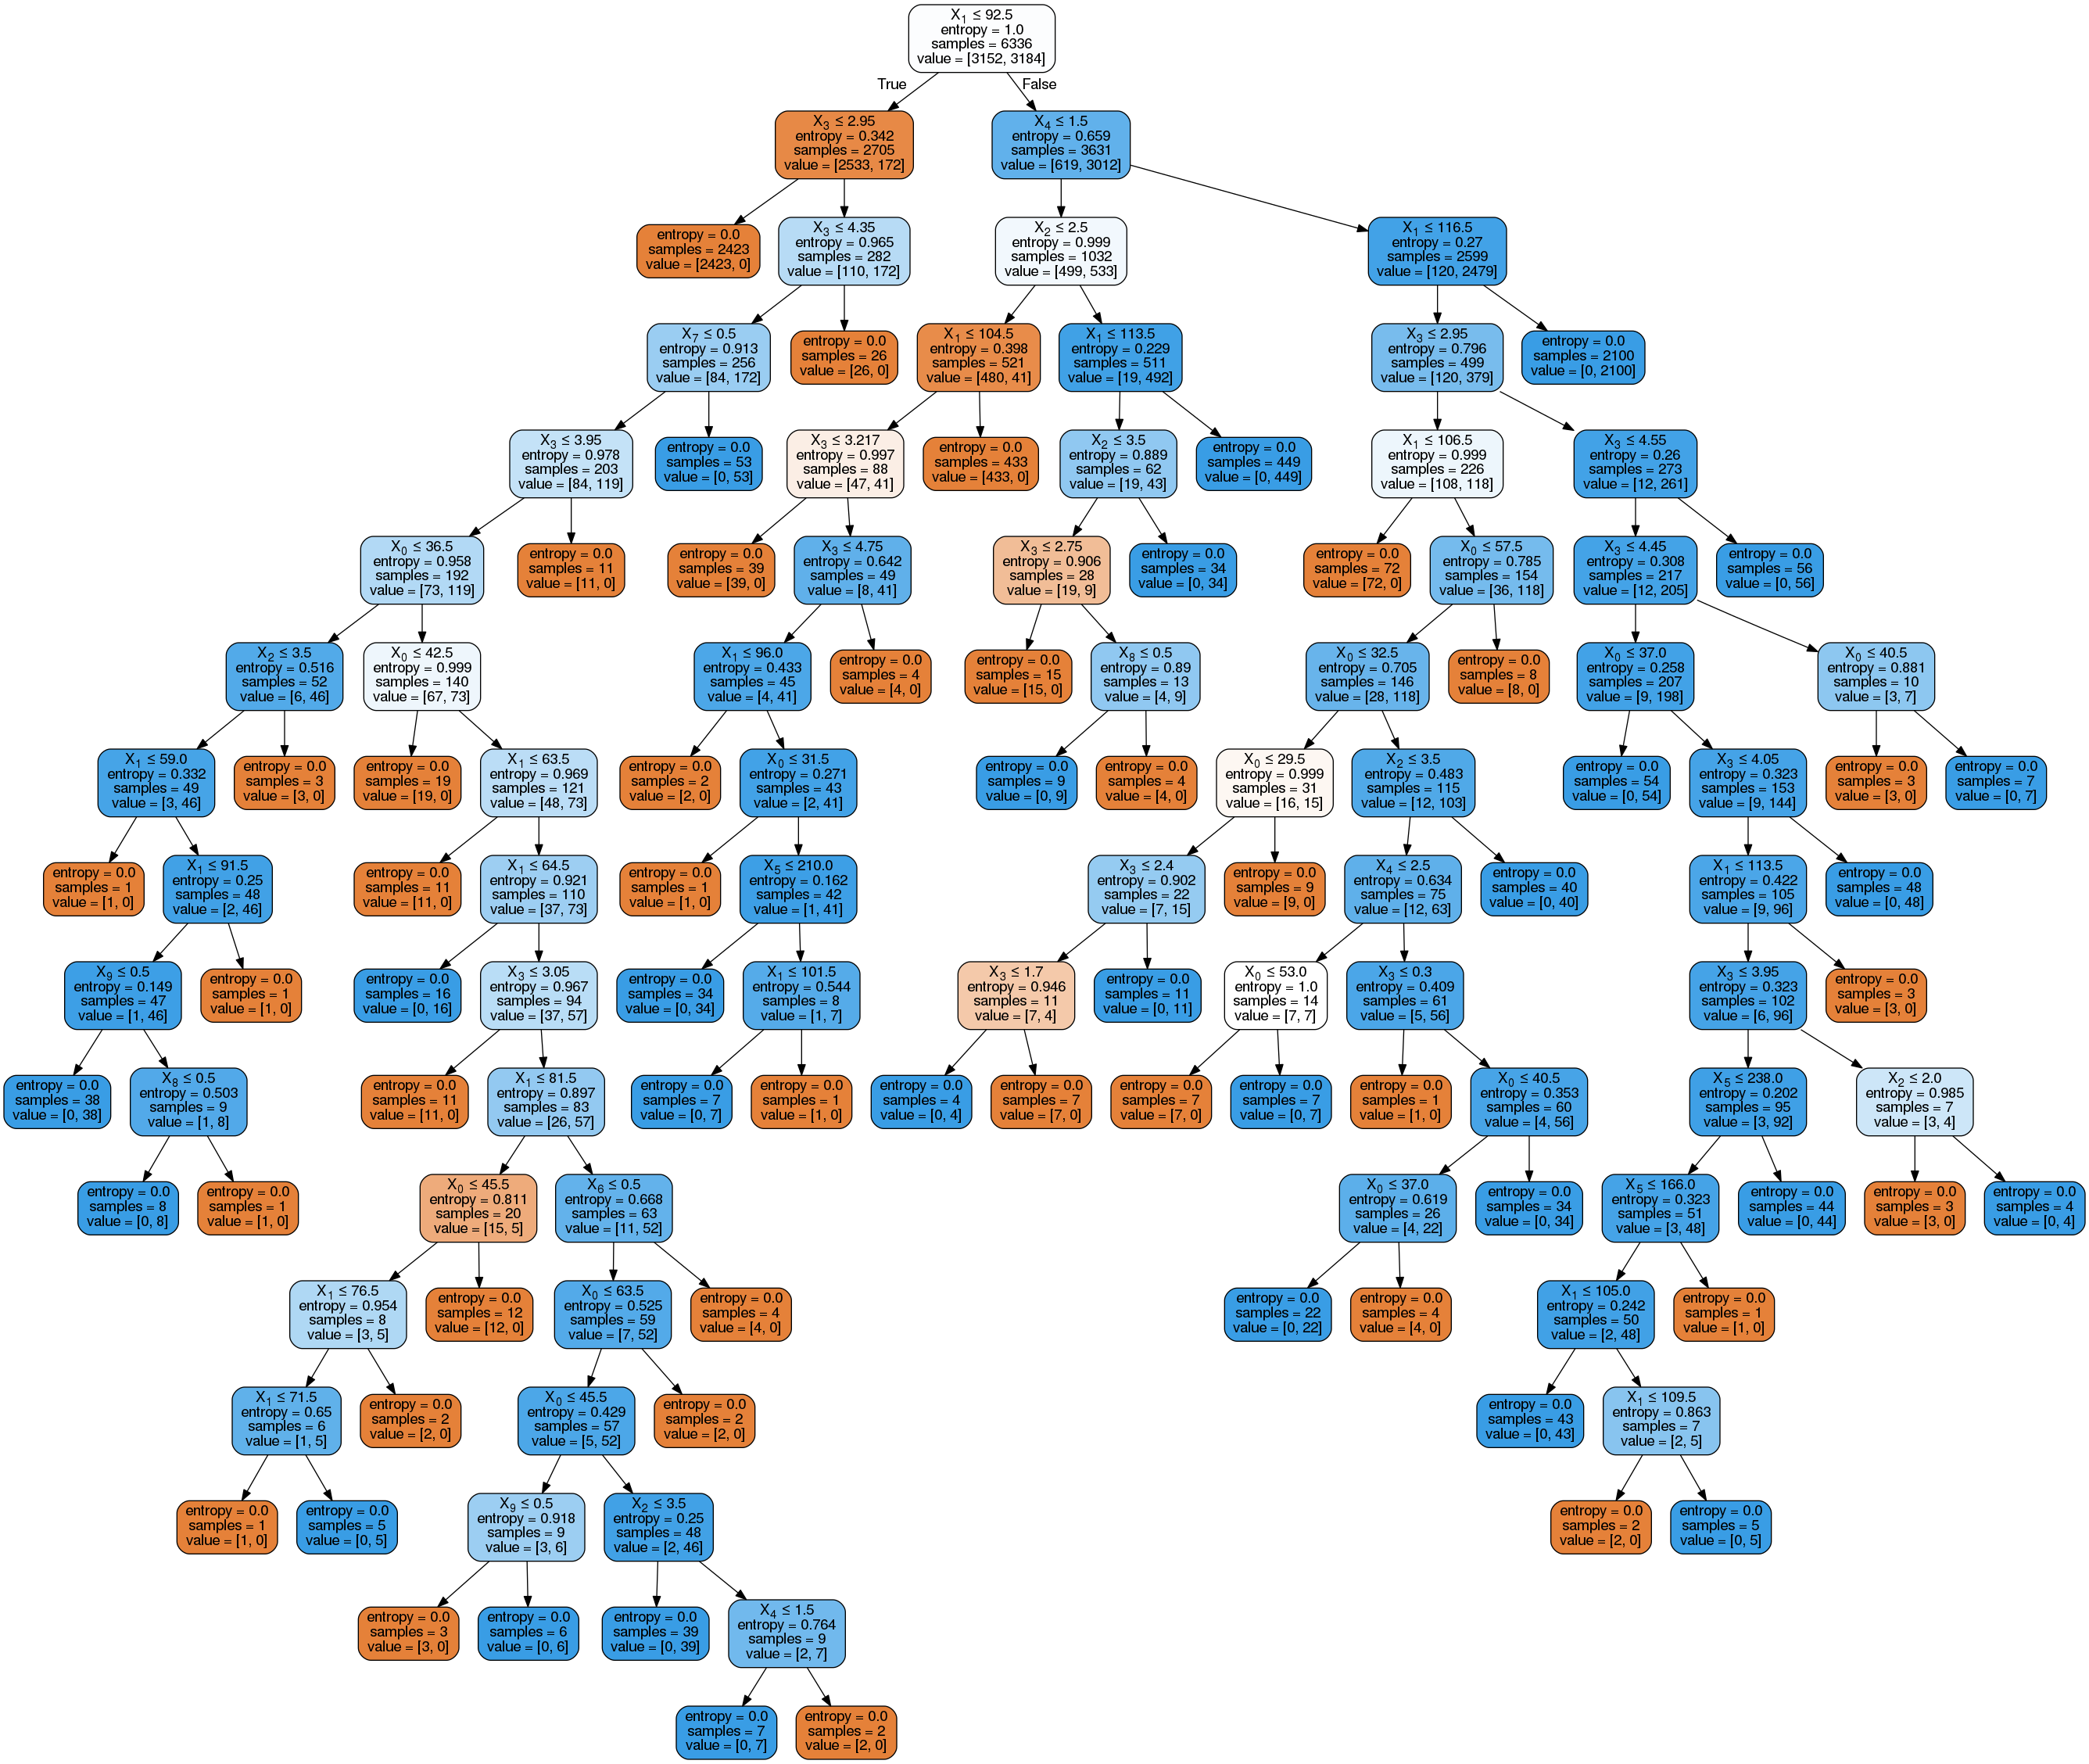

In [73]:
from sklearn.externals.six import StringIO
from sklearn import tree
from sklearn.tree import export_graphviz
from os import system
import pydotplus

train_char_label = ['0', '1']
#personal_loan_File = open('personal_loan_tree.dot','w')
personal_loan_File = StringIO()
export_graphviz(Model5, out_file=personal_loan_File,filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(personal_loan_File.getvalue())  
Image(graph.create_png())

In [74]:
print(Model5.score(x5_train,y5_train))
print(Model5.score(x5_test,y5_test))

1.0
0.9963181148748159


In [75]:
y5_predict = Model5.predict(x5_test)
model_score = Model5.score(x5_test, y5_test)
print(model_score)
print(metrics.confusion_matrix(y5_test, y5_predict))

0.9963181148748159
[[1358   10]
 [   0 1348]]


In [76]:
print(metrics.classification_report(y5_test, y5_predict))

             precision    recall  f1-score   support

          0       1.00      0.99      1.00      1368
          1       0.99      1.00      1.00      1348

avg / total       1.00      1.00      1.00      2716



# Analyzing the confusion matrix:
True Positives (TP): we correctly predicted the people have taken Personal loan as 1359

True Negatives (TN): we correctly predicted the people who have not taken Personal loan as 1348

False Positives (FP): we incorrectly predicted that people have taken loan (a "Type I error") 9 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that people have not taken loan (a "Type II error") 0 Falsely predict negative Type II error

#                              Regularising the Decision Tree

In [77]:
Model6 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
x6_train, x6_test, y6_train,  y6_test = train_test_split(X2, Y2,train_size=0.7, test_size=0.3, random_state=0)
Model6.fit(x6_train, y6_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [82]:
personal_loan_regularized = open('personal_loan_tree_regularized.dot','w')
dot_data = tree.export_graphviz(Model6, out_file= personal_loan_regularized , feature_names = list(x6_train), class_names = list(train_char_label))

personal_loan_regularized.close()

print (pd.DataFrame(Model6.feature_importances_, columns = ["Imp"], index = x6_train.columns))



                         Imp
Age                 0.000000
Income              0.611218
Family              0.124707
CCAvg               0.146509
Education           0.111624
Mortgage            0.000000
Securities Account  0.000000
CD Account          0.005942
Online              0.000000
CreditCard          0.000000


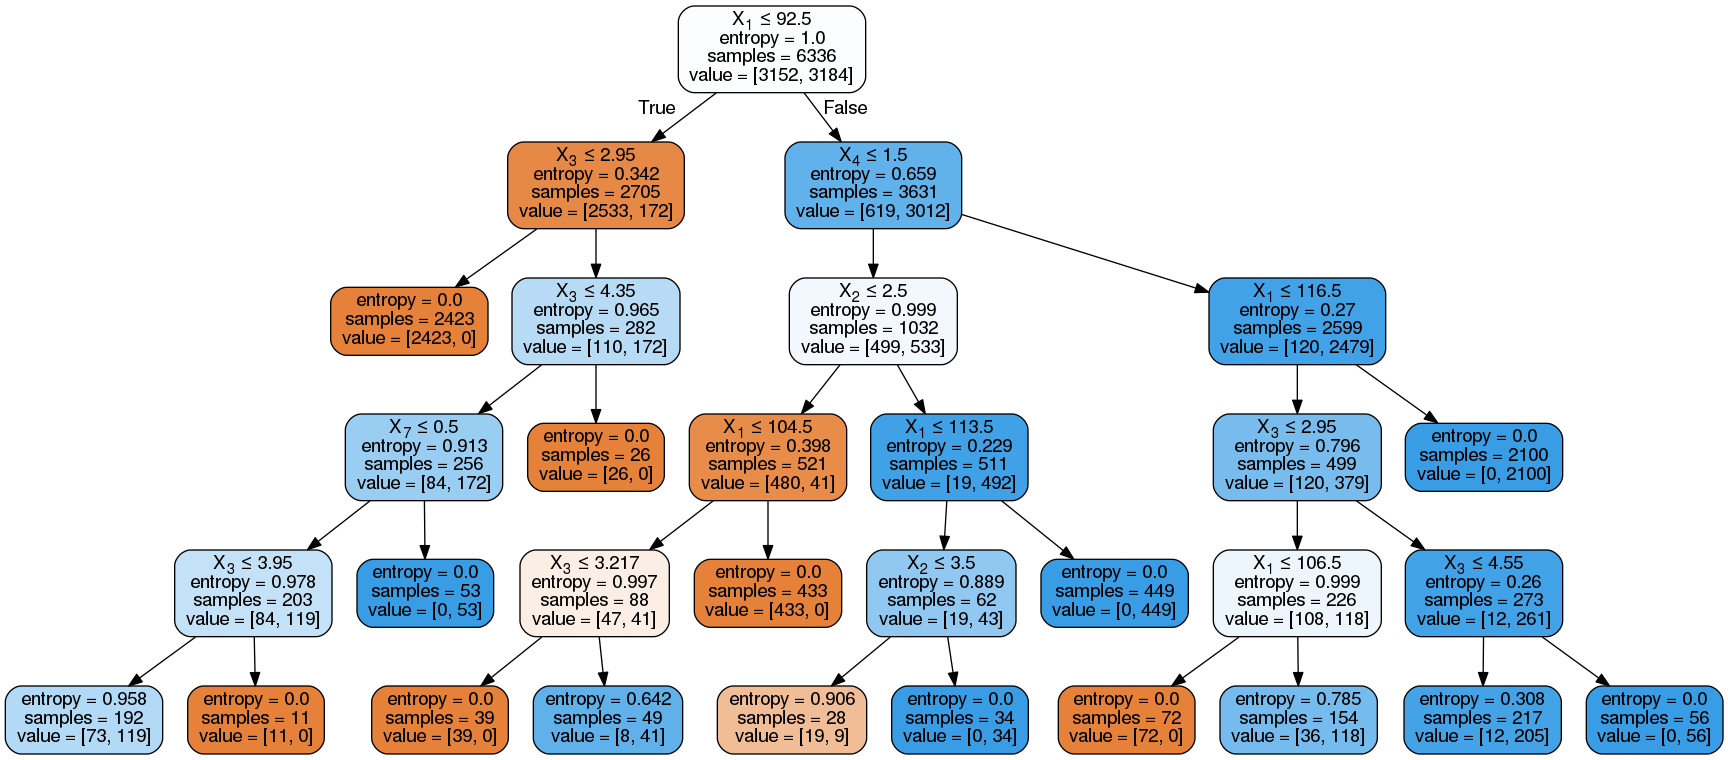

In [83]:
train_char_label = ['0', '1']
#personal_loan_File = open('personal_loan_regularized.dot','w')
personal_loan_regularized = StringIO()
export_graphviz(Model6, out_file=personal_loan_regularized,filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(personal_loan_regularized.getvalue())  
Image(graph.create_png())

In [84]:
print(Model6.score(x6_train,y6_train))
print(Model6.score(x6_test,y6_test))

0.978219696969697
0.9727540500736377


In [85]:
y6_predict = Model5.predict(x6_test)
model_score = Model6.score(x6_test, y6_test)
print(model_score)
print(metrics.confusion_matrix(y6_test, y6_predict))

0.9727540500736377
[[1358   10]
 [   0 1348]]


In [86]:
print(metrics.classification_report(y6_test, y6_predict))

             precision    recall  f1-score   support

          0       1.00      0.99      1.00      1368
          1       0.99      1.00      1.00      1348

avg / total       1.00      1.00      1.00      2716



# Analyzing the confusion matrix:
True Positives (TP): we correctly predicted the people have taken Personal loan as 1359

True Negatives (TN): we correctly predicted the people who have not taken Personal loan as 1348

False Positives (FP): we incorrectly predicted that people have taken loan (a "Type I error") 9 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that people have not taken loan (a "Type II error") 0 Falsely predict negative Type II error

In [87]:
from sklearn.model_selection import cross_val_score
cv_results =cross_val_score(Model6, x6_train, y6_train, cv=5, scoring=scoring)
print(cv_results)

NameError: name 'scoring' is not defined

LR: 0.881795 (0.009648)
KNN: 0.944446 (0.055716)
D-TREE: 0.968959 (0.016108)
NB: 0.817928 (0.059525)


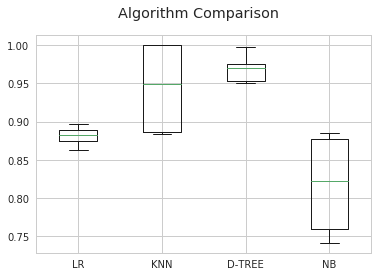

In [88]:
models = []
models.append(('LR', Model2))
models.append(('KNN', Model3))
models.append(('D-TREE', Model6))
models.append(('NB', Model4))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = sklearn.model_selection.KFold(n_splits=10, random_state=12345)
	cv_results = sklearn.model_selection.cross_val_score(model, X2, Y2, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# 6) Explain why you chose one model over the other:

Model-6 With Desicion tree Classifier has been chosen as the best model because the overall accuracy of this model after k-fold Validation is at around 97% and also the analysis of confusion matrix gives better results with very high "precision" and "recall" values and very less Type-1 and Type-2 Errors